#### Project Overview

We have been tasked with creating a predictive model of a buildings heating and cooling loads (Energy Efficiency). Our client, ABC Commercial Real Estate holdings has asked us to provide them with this predictive model so they can get and idea of the heating and cooling load of their entire portfolio without actually having to rate each building. There is a huge $ saving potential if we can provide them with an accurate way of predciting these metrics based off of the existing building characteristics they already have.

We have been provide with the building characteristics and the Heating and Cooling loads of 768 buildings in their portfolio which have already been rated. We will use this data to come out with our predictive model to help ABC Commercial Real Estate estimate their remaining 1,500 buildings in their portfolio.

#### Summary

From our exploration of the data we concluded that the heating and cooling loads of individual buildings have a very strong correlation (0.98) which makes sense as the required energy to heat a building should also roughly equal the required energy to cool a building. Secondly we found that many of the buildings features correlated well with the heating and cooling loads and thus would be suitable for building a multiple linear regression model to test whether we could predict, with some accuracy, the heating and cooling loads of their already rated buildings.

Given the range in correlations between features and the predictor values we will use the recursive feature elimination wrapper method to determine the optimal features to get the best prediction results of the heating and cooling loads. After running the RFE it was determined that the optimal number of features is 5 which minmizes the Root Mean Square Error of the test predictions. These features were:

1.Relative_Compactness
2.Surface_Area
3.Roof_Area
4.Overall_Height
5.Glazing_Area

It is no surpirse that the above features were selected as they are also the ones that have the highest levels of correlation based of our heatmap we produced during EDA.

Now that we have determined the optimal number of features we ran the linear regression model for both Heating and Cooling loads. Based on our model performance we can conclude the following:

1.The model performs slightly better in predicting the heating values then the cooling values as the R2 scores where higher in both training and test data for the heating model (See above RFE plots). Additionally the Root Mean Square Error was lower for both training and test in the heating model then when compared to the cooling model. You can see from plots below that overall the model is doing a good job at predciting, particularly in 10-15 load range were the majority of the buildings reside. The majority of the residuals for these values are within +/- 2 values of the actuals.

2.When we examined the residuals, we noticed that they were normally distributed with the majority of the residuals residing within +/- 3 points from the actual prediction. However we did notice that a pattern appeared in the plot, as the actual heating or cooling loads increased the residuals moved from the top left portion of plot down and to and to the right.

While not ideal, as the residuals should ideally be independent of one another it may be due to the features available to us for input into the model. The highest correlated feature, overall height, only had 2 values and glazing area and roof area had 4 values each which can impact how the model develops its predictive capabilty as the actual loads vary across the limited values in the features. See below for scatter plots of the Actual Heating Loads of all buildings in the dataset vs the best predictor features chosen. This illistrates the point above that many of predictor features have a large range of heating loads across a small number of variables in each feature and I think this is hurting our models predictive capabilities, particularly in the large loads >20.

#### Conclusion

Based off our analysis and modeling of the building characteristics we can conclude that this regression model has scored well in prediciting the heating and cooling loads in the test data. Furthermore I would say that this model is fit for purpose for use by ABC company in using it to classify their remaining 1500 buildings which haven't been rated as this model will predict the heating and cooling loads will a good deal of accuracy. That said there are limiations, particular in the performance of predicting larger loads above 20 and the tendancy fro the model to over predict loads in the 20-30 range and under predict in the 40+ loads.

#### Load, Inspect and Clean Data

In [69]:
#Load Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

df = pd.read_csv('energy_efficiency_data.csv')

In [70]:
#Inspect Data
#print(df.describe())
#Check for null values
null_rows  = df[df.isnull().any(axis=1)]
#No null values
#From describe the data looks clean so we will proceed to EDA

#### Exploratory Data Analysis

1.From EDA we can see the cooling and heating distributions are bimodal with a right skew. Additionally the heating and cooling loads are not distributed in the same way but when we plot on a scatter plot and view correlation figures on a heat map they are strongly correlated at 0.98.

2.The strongest correlation between building features and the heating and cooling loads is overall height with a correlation of 0.9. The weakest correlation is orientation at 0.0026 for heating and 0.0014 for cooling.

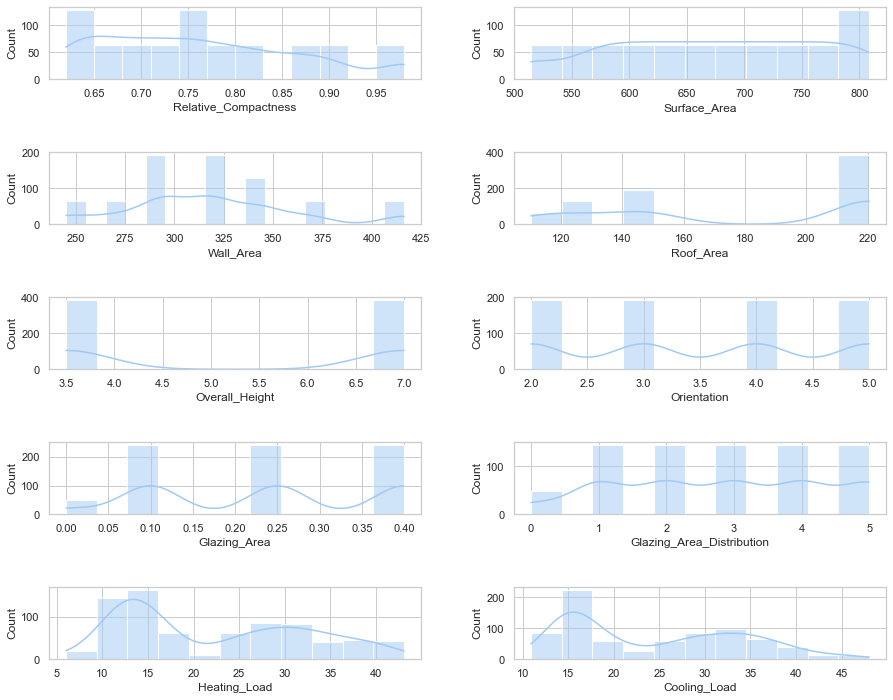

<Figure size 432x288 with 0 Axes>

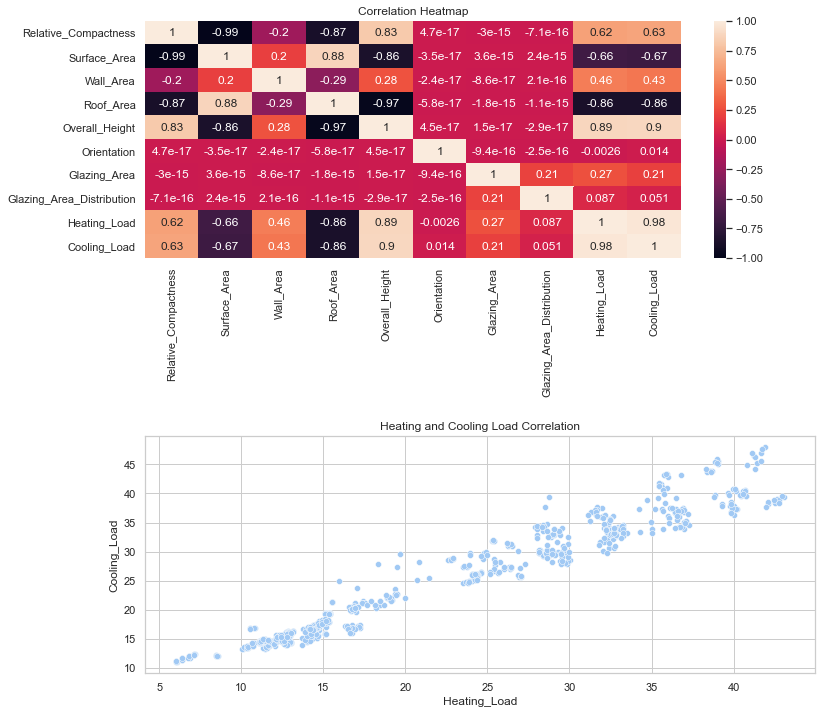

<Figure size 432x288 with 0 Axes>

In [71]:
#Explore data distributions of columns
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=1, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

sns.histplot(data=df, x="Relative_Compactness", kde=True, ax=axes[0,0])
sns.histplot(data=df, x="Surface_Area", kde=True, ax=axes[0,1])
sns.histplot(data=df, x="Wall_Area", kde=True, ax=axes[1,0])
sns.histplot(data=df, x="Roof_Area", kde=True, ax=axes[1,1])
sns.histplot(data=df, x="Overall_Height", kde=True, ax=axes[2,0])
sns.histplot(data=df, x="Orientation", kde=True, ax=axes[2,1])
sns.histplot(data=df, x="Glazing_Area", kde=True, ax=axes[3,0])
sns.histplot(data=df, x="Glazing_Area_Distribution", kde=True, ax=axes[3,1])
sns.histplot(data=df, x="Heating_Load", kde=True, ax=axes[4,0])
sns.histplot(data=df, x="Cooling_Load", kde=True, ax=axes[4,1])
plt.savefig('Hist_Plot_Df_Features.png')
plt.show()
plt.clf()

#Set up subplots for heating and cooling correlation analysis
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
fig.subplots_adjust(hspace=0.75, wspace=0.5)
sns.set_theme(style="whitegrid", palette="pastel")

#plot heat map to determine correlation amongst values
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True, ax=axes[0]).set_title("Correlation Heatmap")
#plot heating and cooling load to compare relationship
sns.scatterplot(data=df, x='Heating_Load', y='Cooling_Load', ax=axes[1]).set_title("Heating and Cooling Load Correlation")
plt.savefig('Heat_Cool_Scatter_Feature_Heatmap.png')
plt.show()
plt.clf()

#### Linear Regression Model - Feature Importance

Use Recursive Feature Elimination to determine which values are most important in obtaining the best R2 test score and reducing Root Mean Square Error.

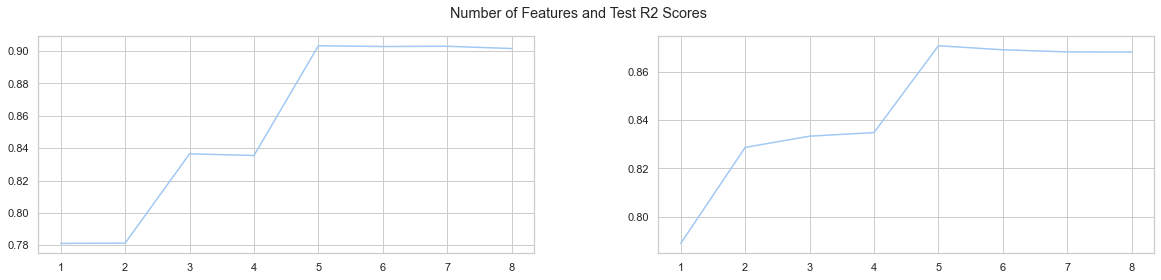

The features identified as most important for the heating predictions are:
['Relative_Compactness', 'Surface_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']
The features identified as most important for the cooling predictions are:
['Relative_Compactness', 'Surface_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']


<Figure size 432x288 with 0 Axes>

In [72]:
# Recursive Feature Elimination for Heating and Cooling Loads

# Create X and y variables
y_heat = df['Heating_Load']
y_cool = df['Cooling_Load']
X = df.drop(columns = ['Heating_Load', 'Cooling_Load'])

# Create feature list
feature_list = list(X.columns)

# Divide into Training and Test sets
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X, y_heat, test_size=0.7, train_size=0.3, random_state=15)
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X, y_cool, test_size=0.7, train_size=0.3, random_state=15)

# Standardize the feature data
X_train_heat = StandardScaler().fit_transform(X_train_heat)
X_test_heat = StandardScaler().fit_transform(X_test_heat)
X_train_cool = StandardScaler().fit_transform(X_train_cool)
X_test_cool = StandardScaler().fit_transform(X_test_cool)

# Logistic regression model
lr = LinearRegression()

# Recursive feature elimination loop
rfe_list_heat = []

for x in range(1, 9):
    rfe = RFE(lr, n_features_to_select=x)
    rfe.fit(X_train_heat, y_train_heat)
    rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]
    rfe_score_train = rfe.score(X_train_heat, y_train_heat)
    rfe_score_test = rfe.score(X_test_heat, y_test_heat)
    rfe_rmse_train = mean_squared_error(y_train_heat, rfe.predict(X_train_heat), squared=False)
    rfe_rmse_test = mean_squared_error(y_test_heat, rfe.predict(X_test_heat), squared=False)
    rfe_list_heat.append([x, rfe_features, rfe_score_train, rfe_score_test, rfe_rmse_train, rfe_rmse_test])

rfe_list_cool = []

for x in range(1, 9):
    rfe = RFE(lr, n_features_to_select=x)
    rfe.fit(X_train_cool, y_train_cool)
    rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]
    rfe_score_train = rfe.score(X_train_cool, y_train_cool)
    rfe_score_test = rfe.score(X_test_cool, y_test_cool)
    rfe_rmse_train = mean_squared_error(y_train_cool, rfe.predict(X_train_cool), squared=False)
    rfe_rmse_test = mean_squared_error(y_test_cool, rfe.predict(X_test_cool), squared=False)
    rfe_list_cool.append([x, rfe_features, rfe_score_train, rfe_score_test, rfe_rmse_train, rfe_rmse_test])
        
# Create dataframe of rfe_list, plot R2 test scores and show best feature list
rfe_heat_df = pd.DataFrame(rfe_list_heat, columns=['n_features', 'column_names', 'training_R2_score', 'test_R2_score', 'training_rmse', 'test_rmse'])
rfe_cool_df = pd.DataFrame(rfe_list_cool, columns=['n_features', 'column_names', 'training_R2_score', 'test_R2_score', 'training_rmse', 'test_rmse'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
fig.suptitle('Number of Features and Test R2 Scores')
fig.subplots_adjust(hspace=1, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

ax1.plot(rfe_heat_df['n_features'], rfe_heat_df['test_R2_score'])
ax2.plot(rfe_cool_df['n_features'], rfe_cool_df['test_R2_score'])
plt.savefig('Feature_R2_Scores_Plot.png')
plt.show()
plt.clf()

rfe_heat_df = rfe_heat_df.sort_values(by='test_rmse', ascending=True)
rfe_cool_df = rfe_cool_df.sort_values(by='test_rmse', ascending=True)

print('The features identified as most important for the heating predictions are:\n' + str(rfe_heat_df['column_names'].iloc[0]))
print('The features identified as most important for the cooling predictions are:\n' + str(rfe_cool_df['column_names'].iloc[0]))

#### Build Linear Regression Model

Build and analyze the results of the linear regression model using the features identified in the Recursive Feature Elimination above.

The R2 score for model based on the training data was 0.9255679902738119
The R2 score for model based on the test data was 0.9033072518172799
The Root Mean Square Error on the training data is 2.708476193383521
The Root Mean Square Error on the test data is 3.1531768143878764


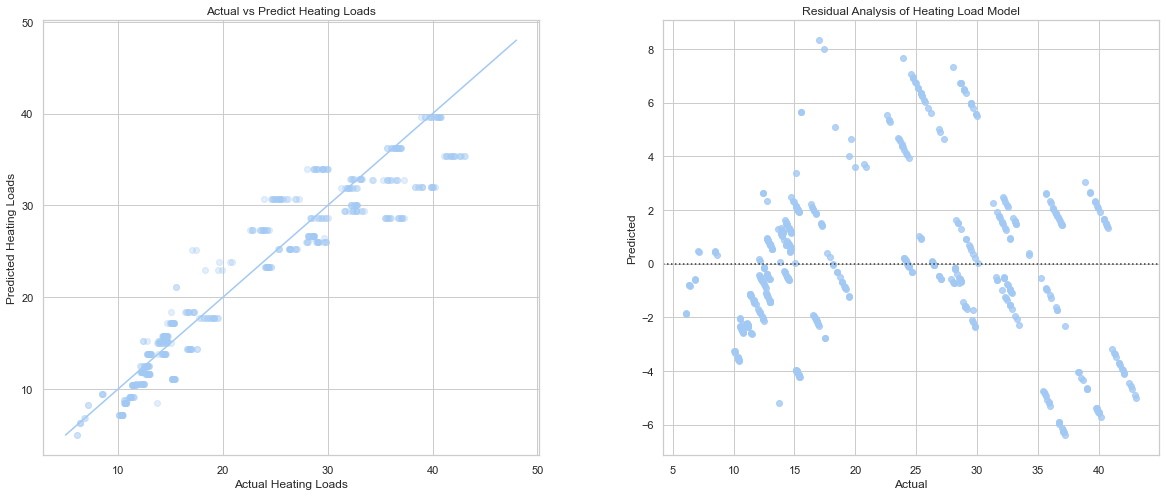

<Figure size 432x288 with 0 Axes>

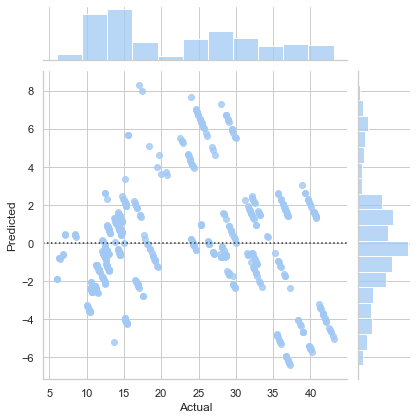

<Figure size 432x288 with 0 Axes>

In [73]:
# Heating Regression Model
# Prepare Data
X = df[['Relative_Compactness', 'Surface_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']].values
y = df['Heating_Load'].values

# Divide into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3, random_state=15)

# Scale train and test features using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

# Train the Model
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

# Make Predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create Residual table
res_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
res_test['Residuals'] = abs(res_test['Actual'] - res_test['Predicted'])

#Evaluate Model
print("The R2 score for model based on the training data was " + str(model.score(X_train, y_train)))
print("The R2 score for model based on the test data was " + str(model.score(X_test, y_test)))
print("The Root Mean Square Error on the training data is " + str(mean_squared_error(y_train, y_pred_train, squared=False)))
print("The Root Mean Square Error on the test data is " + str(mean_squared_error(y_test, y_pred_test, squared=False)))

#Visualize results of prediction vs actual in test set
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

axes[0].plot((list(range(5, 49))), (list(range(5, 49))))
axes[0].scatter(res_test['Actual'], res_test['Predicted'], alpha=0.3)
axes[0].set_title("Actual vs Predict Heating Loads")
axes[0].set_xlabel("Actual Heating Loads")
axes[0].set_ylabel("Predicted Heating Loads")
sns.residplot(x=res_test['Actual'], y=res_test['Predicted'], ax=axes[1]).set_title('Residual Analysis of Heating Load Model')
plt.savefig('Prediction_Heat_Loads_Analysis.png')
plt.show()
plt.clf()

sns.jointplot(data=res_test,x=res_test['Actual'], y=res_test['Predicted'], kind="resid")
plt.savefig('Residual_Heat_Loads_Jointplot.png')
plt.show()
plt.clf()

The R2 score for model based on the training data was 0.9062095356461365
The R2 score for model based on the test data was 0.8707771839716978
The Root Mean Square Error on the training data is 2.855898255489622
The Root Mean Square Error on the test data is 3.4415605444629653


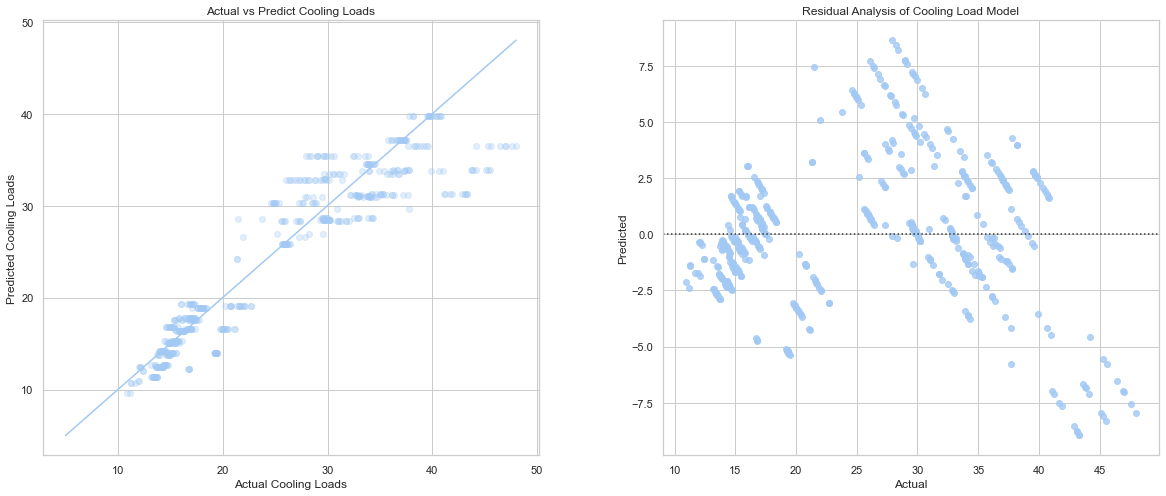

<Figure size 432x288 with 0 Axes>

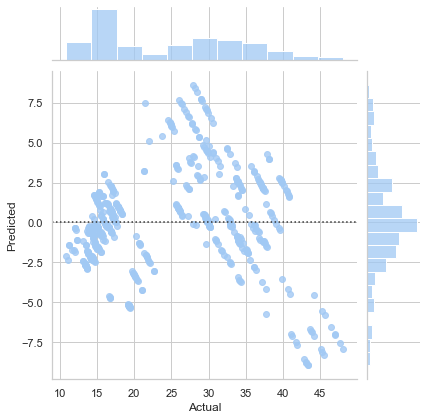

<Figure size 432x288 with 0 Axes>

In [74]:
# Cooling Regression Model
# Prepare Data
X = df[['Relative_Compactness', 'Surface_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']].values
y = df['Cooling_Load'].values

# Divide into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3, random_state=15)

# Scale train and test features using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

# Train the Model
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

# Make Predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create Residual table
res_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
res_test['Residuals'] = abs(res_test['Actual'] - res_test['Predicted'])

#Evaluate Model
print("The R2 score for model based on the training data was " + str(model.score(X_train, y_train)))
print("The R2 score for model based on the test data was " + str(model.score(X_test, y_test)))
print("The Root Mean Square Error on the training data is " + str(mean_squared_error(y_train, y_pred_train, squared=False)))
print("The Root Mean Square Error on the test data is " + str(mean_squared_error(y_test, y_pred_test, squared=False)))

#Visualize results of prediction vs actual in test set
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

axes[0].plot((list(range(5, 49))), (list(range(5, 49))))
axes[0].scatter(res_test['Actual'], res_test['Predicted'], alpha=0.3)
axes[0].set_title("Actual vs Predict Cooling Loads")
axes[0].set_xlabel("Actual Cooling Loads")
axes[0].set_ylabel("Predicted Cooling Loads")
sns.residplot(x=res_test['Actual'], y=res_test['Predicted'], ax=axes[1]).set_title('Residual Analysis of Cooling Load Model')
plt.savefig('Prediction_Cool_Loads_Analysis.png')
plt.show()
plt.clf()

sns.jointplot(data=res_test,x=res_test['Actual'], y=res_test['Predicted'], kind="resid")
plt.savefig('Residual_Cool_Loads_Jointplot.png')
plt.show()
plt.clf()

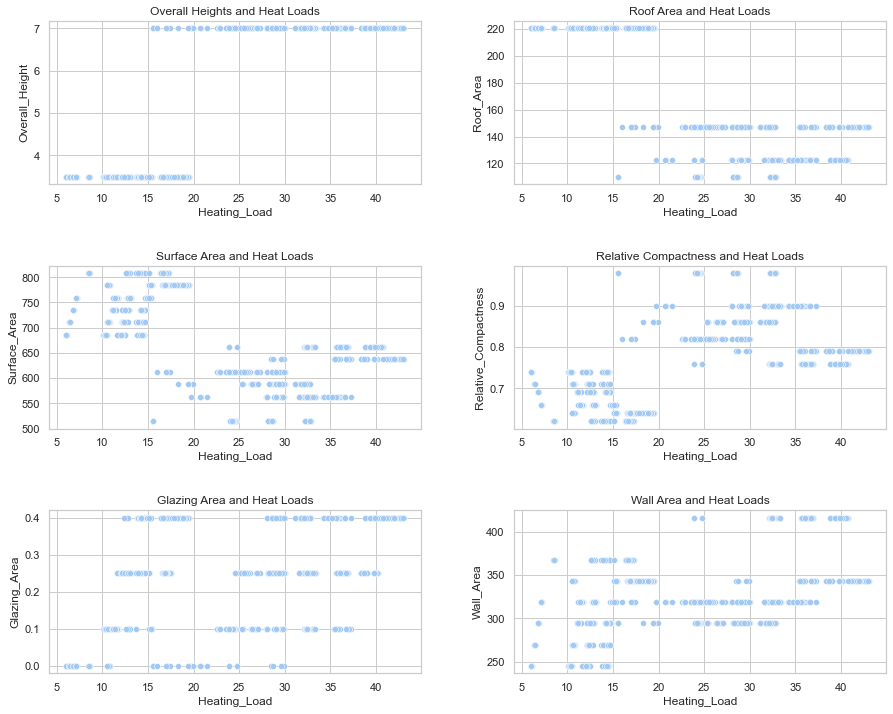

In [75]:
# Feature and Heating Loads Scatterplots

df_features = df[['Relative_Compactness', 'Surface_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area', 'Wall_Area', 'Heating_Load']]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

sns.scatterplot(data=df_features, x='Heating_Load', y='Overall_Height', ax=axes[0,0]).set_title('Overall Heights and Heat Loads')
sns.scatterplot(data=df_features, x='Heating_Load', y='Roof_Area', ax=axes[0,1]).set_title('Roof Area and Heat Loads')
sns.scatterplot(data=df_features, x='Heating_Load', y='Surface_Area', ax=axes[1,0]).set_title('Surface Area and Heat Loads')
sns.scatterplot(data=df_features, x='Heating_Load', y='Relative_Compactness', ax=axes[1,1]).set_title('Relative Compactness and Heat Loads')
sns.scatterplot(data=df_features, x='Heating_Load', y='Glazing_Area', ax=axes[2,0]).set_title('Glazing Area and Heat Loads')
sns.scatterplot(data=df_features, x='Heating_Load', y='Wall_Area', ax=axes[2,1]).set_title('Wall Area and Heat Loads')
plt.savefig('Feature_Heat_Loads_Scatter.png')
plt.show()